Student Performance Indicator

Life cycle of Machine learning Project

1.Understanding the Problem Statement
2.Data Collection
3.Data Checks to perform
4.Exploratory data analysis
5.Data Pre-Processing
6.Model Training
7.Choose best model

1) Problem statement

This project understands how the student's performance (test scores) is affected by other variables such as Gender, Ethnicity, Parental level of education, Lunch and Test preparation course.

2) Data Collection

Dataset Source - https://www.kaggle.com/datasets/spscientist/students-performance-in-exams?datasetId=74977
The data consists of 8 column and 1000 rows.


2.1 Import Data and Required Packages

Importing Pandas, Numpy, Matplotlib, Seaborn and Warings Library.

In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
import warnings
warnings.filterwarnings('ignore')

C:\Users\srish\anaconda3\lib\site-packages\pandas\core\computation\expressions.py:20: UserWarning: Pandas requires version '2.7.3' or newer of 'numexpr' (version '2.7.1' currently installed).
  from pandas.core.computation.check import NUMEXPR_INSTALLED


%matplotlib inline:
This is a magic command specific to IPython and Jupyter notebooks.
It ensures that matplotlib plots are displayed inline—i.e., directly below the code cell that produced them.
Useful when working interactively in Jupyter Notebook environments.

import warnings:
Imports Python's built-in warnings module, which allows control over warning messages.
warnings.filterwarnings('ignore'):
This suppresses all warning messages, meaning they won't be shown in the output.
Useful for cleaning up notebook output, but be careful—it might hide important warnings that could help identify issues in your code.

Import the CSV Data as Pandas DataFrame

In [2]:
df = pd.read_csv("C:/Users/srish/Downloads/stud.csv")

Displaying first 5 values.

In [3]:
df.head()

,gender,race_ethnicity,parental_level_of_education,lunch,test_preparation_course,math_score,reading_score,writing_score
0,female,group B,bachelor's degree,standard,none,72,72,74
1,female,group C,some college,standard,completed,69,90,88
2,female,group B,master's degree,standard,none,90,95,93
3,male,group A,associate's degree,free/reduced,none,47,57,44
4,male,group C,some college,standard,none,76,78,75


Displaying the shape

In [4]:
df.shape

(1000, 8)

2.2 Dataset information

gender : sex of students -> (Male/female)
race/ethnicity : ethnicity of students -> (Group A, B,C, D,E)
parental level of education : parents' final education ->(bachelor's degree,some college,master's degree,associate's degree,high school)
lunch : having lunch before test (standard or free/reduced)
test preparation course : complete or not complete before test
math score
reading score
writing score

3. Data Checks to perform
Check Missing values
Check Duplicates
Check data type
Check the number of unique values of each column
Check statistics of data set
Check various categories present in the different categorical column

# 3.1 Checking missing values

In [5]:
df.isna().sum()

gender                         0
race_ethnicity                 0
parental_level_of_education    0
lunch                          0
test_preparation_course        0
math_score                     0
reading_score                  0
writing_score                  0
dtype: int64

There is no null values in the datasets

# 3.2 Check Duplicates

In [6]:
df.duplicated().sum()

0

There is no duplicate values in the datasets

# 3.3 Check data types

In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 8 columns):
 #   Column                       Non-Null Count  Dtype 
---  ------                       --------------  ----- 
 0   gender                       1000 non-null   object
 1   race_ethnicity               1000 non-null   object
 2   parental_level_of_education  1000 non-null   object
 3   lunch                        1000 non-null   object
 4   test_preparation_course      1000 non-null   object
 5   math_score                   1000 non-null   int64 
 6   reading_score                1000 non-null   int64 
 7   writing_score                1000 non-null   int64 
dtypes: int64(3), object(5)
memory usage: 62.6+ KB


# 3.4 Checking the number of unique values of each column

In [8]:
df.nunique()

gender                          2
race_ethnicity                  5
parental_level_of_education     6
lunch                           2
test_preparation_course         2
math_score                     81
reading_score                  72
writing_score                  77
dtype: int64

# 3.5 Check statistics of data set

In [9]:
df.describe()

,math_score,reading_score,writing_score
count,1000.00000,1000.000000,1000.000000
mean,66.08900,69.169000,68.054000
std,15.16308,14.600192,15.195657
min,0.00000,17.000000,10.000000
25%,57.00000,59.000000,57.750000
50%,66.00000,70.000000,69.000000
75%,77.00000,79.000000,79.000000
max,100.00000,100.000000,100.000000


In [10]:
print("Categories in 'gender' variable: ", end =" ")
print(df['gender'].unique())

print("Categories in 'race_ethnicity' variable: ", end =" ")
print(df['race_ethnicity'].unique())

print("Categories in 'parental_level_of_education' variable: ", end =" ")
print(df['parental_level_of_education'].unique())

print("Categories in 'lunch' variable: ", end =" ")
print(df['lunch'].unique())

print("Categories in 'test_preparation_course' variable: ", end =" ")
print(df['test_preparation_course'].unique())



Categories in 'gender' variable:  ['female' 'male']
Categories in 'race_ethnicity' variable:  ['group B' 'group C' 'group A' 'group D' 'group E']
Categories in 'parental_level_of_education' variable:  ["bachelor's degree" 'some college' "master's degree" "associate's degree"
 'high school' 'some high school']
Categories in 'lunch' variable:  ['standard' 'free/reduced']
Categories in 'test_preparation_course' variable:  ['none' 'completed']


# Cateogorical and numerical variables.

In [11]:
numeric_features = [feature for feature in df.columns if df[feature].dtype != 'O']
categorical_features = [feature for feature in df.columns if df[feature].dtype == 'O']

print('We have {} numerical features : {}'.format(len(numeric_features), numeric_features))
print('\nWe have {} categorical features : {}'.format(len(categorical_features), categorical_features))

We have 3 numerical features : ['math_score', 'reading_score', 'writing_score']

We have 5 categorical features : ['gender', 'race_ethnicity', 'parental_level_of_education', 'lunch', 'test_preparation_course']


# 3.8 Adding columns for "Total Score" and "Average"

In [12]:
df.head(2)

,gender,race_ethnicity,parental_level_of_education,lunch,test_preparation_course,math_score,reading_score,writing_score
0,female,group B,bachelor's degree,standard,none,72,72,74
1,female,group C,some college,standard,completed,69,90,88


In [13]:
df['total_score'] = df['math_score'] + df['reading_score'] +df['writing_score']
df['average'] = df['total_score']/3
df.head()

,gender,race_ethnicity,parental_level_of_education,lunch,test_preparation_course,math_score,reading_score,writing_score,total_score,average
0,female,group B,bachelor's degree,standard,none,72,72,74,218,72.666667
1,female,group C,some college,standard,completed,69,90,88,247,82.333333
2,female,group B,master's degree,standard,none,90,95,93,278,92.666667
3,male,group A,associate's degree,free/reduced,none,47,57,44,148,49.333333
4,male,group C,some college,standard,none,76,78,75,229,76.333333


In [14]:
math_full = df[df['math_score'] == 100]['average'].count()
writing_full = df[df['writing_score'] == 100]['average'].count()
reading_full = df[df['reading_score'] == 100]['average'].count()

print(f'Number of students with full marks in Maths: {math_full}')
print(f'Number of students with full marks in Writing: {writing_full}')
print(f'Number of students with full marks in Reading: {reading_full}')

Number of students with full marks in Maths: 7
Number of students with full marks in Writing: 14
Number of students with full marks in Reading: 17


In [15]:
math_less_20 = df[df['math_score'] <= 20]['average'].count() 
reading_less_20 = df[df['reading_score'] <= 20]['average'].count()
writing_less_20 = df[df['writing_score'] <= 20]['average'].count()

print(f'Number of students with less than 20 marks in Maths: {math_less_20}')
print(f'Number of students with with less than 20 marks in Writing: {writing_less_20}')
print(f'Number of students with with less than 20 marks in Reading: {reading_less_20}')

Number of students with less than 20 marks in Maths: 4
Number of students with with less than 20 marks in Writing: 3
Number of students with with less than 20 marks in Reading: 1


4. Exploring Data(Visualization)

4.1 Visualize average score distribution to make some conclusion.
Histogram
Kernel Distribution Function (KDE)

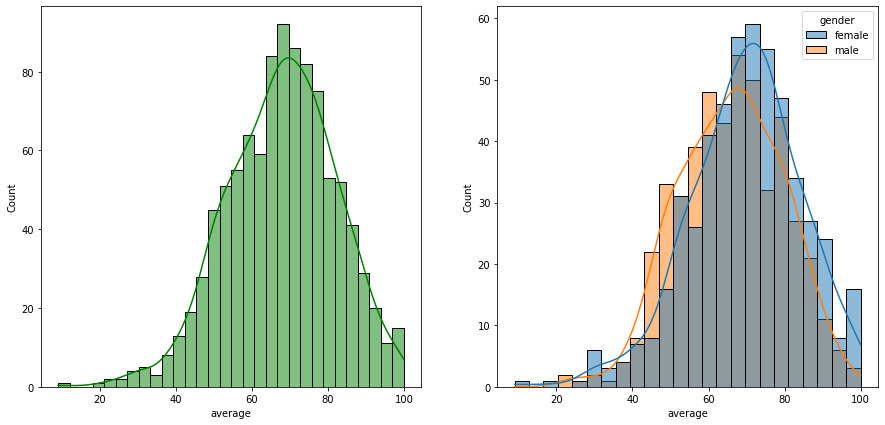

In [16]:
fig, axs = plt.subplots(1, 2, figsize=(15, 7))
plt.subplot(121)
sns.histplot(data=df,x='average',bins=30,kde=True,color='g')
plt.subplot(122)
sns.histplot(data=df,x='average',kde=True,hue='gender')
plt.show()

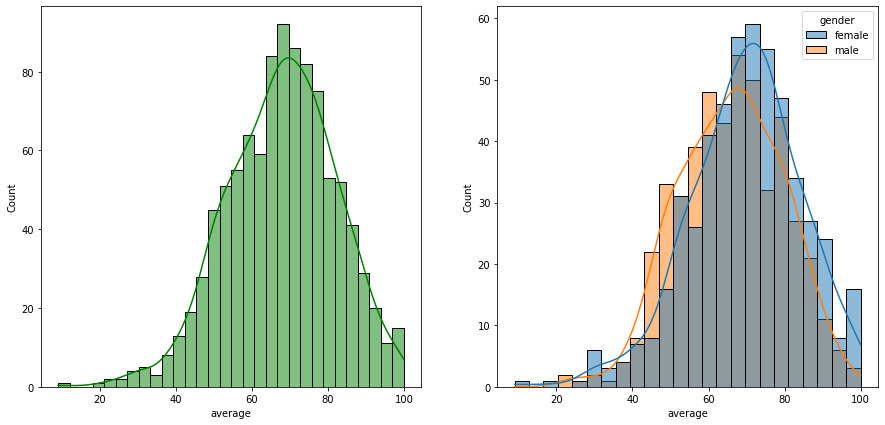

In [17]:
fig, axs = plt.subplots(1 , 2, figsize = (15,7))
plt.subplot(121)
sns.histplot(data=df,x='average',bins=30,kde=True,color='g')
plt.subplot(122)
sns.histplot(data=df,x='average',kde = True, hue = 'gender')
plt.show()

Insights

Female are performing better than male.

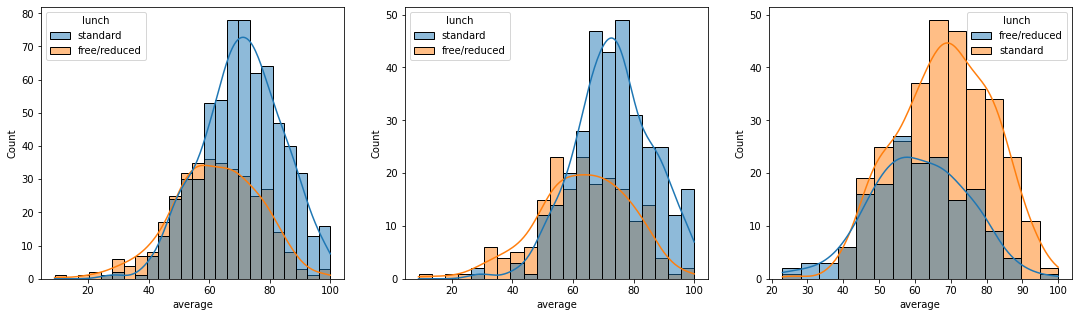

In [18]:
fig , axs = plt.subplots(1,3, figsize = (25,5))
plt.subplot(141)
sns.histplot(data = df,x='average',kde = True, hue = 'lunch')
plt.subplot(142)
sns.histplot(data=df[df.gender=='female'],x='average',kde=True,hue='lunch')
plt.subplot(143)
sns.histplot(data=df[df.gender=='male'],x='average',kde=True,hue='lunch')
plt.show()

Insights


Standard lunch helps perform well in exams.

Standard lunch helps perform well in exams be it a male or a female.

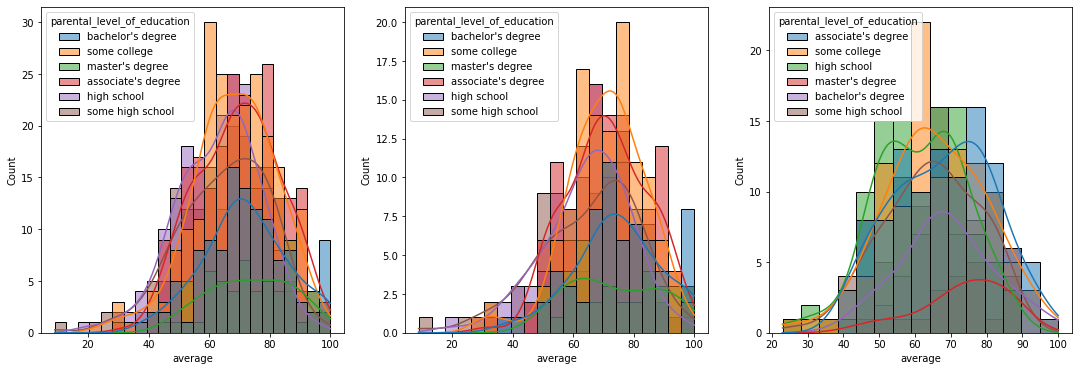

In [19]:
fig, axs = plt.subplots(1,3, figsize = (25, 6))
plt.subplot(141)
sns.histplot(data = df,x='average',kde = True, hue = 'parental_level_of_education')
plt.subplot(142)
sns.histplot(data = df[df.gender=='female'],x='average',kde = True, hue = 'parental_level_of_education')
plt.subplot(143)
sns.histplot(data = df[df.gender=='male'],x='average',kde = True, hue = 'parental_level_of_education')
plt.show()

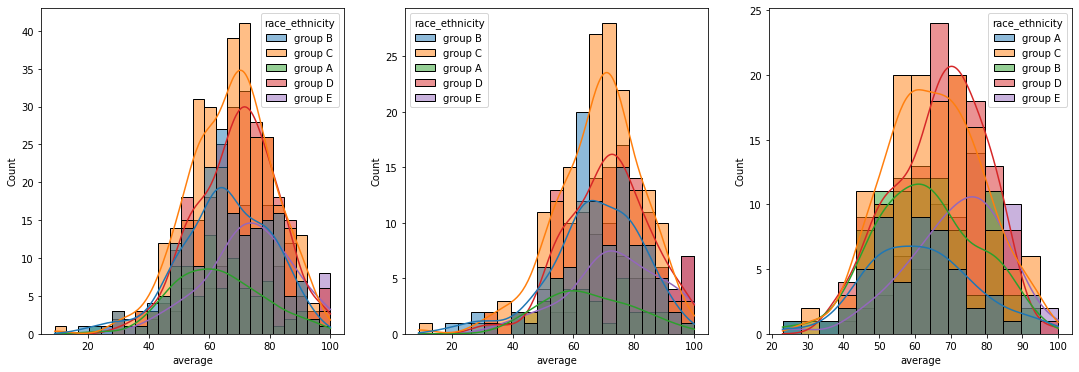

In [22]:
plt.subplots(1,3,figsize=(25,6))
plt.subplot(141)
ax =sns.histplot(data=df,x='average',kde=True,hue='race_ethnicity')
plt.subplot(142)
ax =sns.histplot(data=df[df.gender=='female'],x='average',kde=True,hue='race_ethnicity')
plt.subplot(143)
ax =sns.histplot(data=df[df.gender=='male'],x='average',kde=True,hue='race_ethnicity')
plt.show()

Insights

Students of group A and group B tends to perform poorly in exam.

Students of group A and group B tends to perform poorly in exam irrespective of whether they are male or female

# 4.2 Maximumum score of students in all three subjects

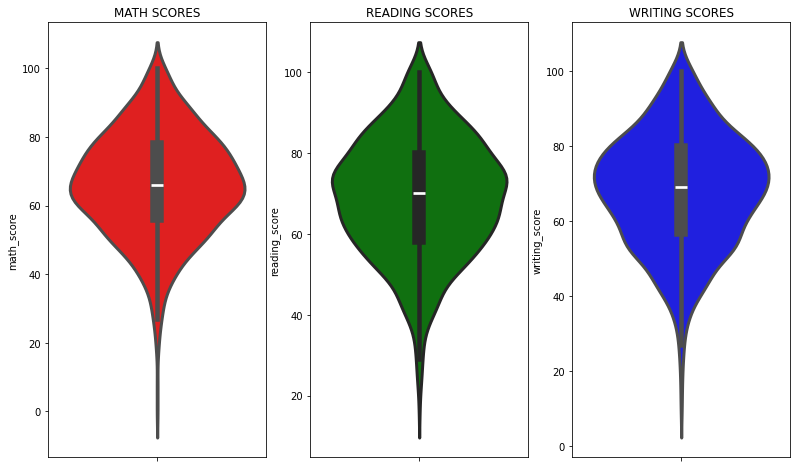

In [25]:
plt.figure(figsize=(18,8))
plt.subplot(1, 4, 1)
plt.title('MATH SCORES')
sns.violinplot(y='math_score',data=df,color='red',linewidth=3)
plt.subplot(1, 4, 2)
plt.title('READING SCORES')
sns.violinplot(y='reading_score',data=df,color='green',linewidth=3)
plt.subplot(1, 4, 3)
plt.title('WRITING SCORES')
sns.violinplot(y='writing_score',data=df,color='blue',linewidth=3)
plt.show()

# UNIVARIATE ANALYSIS ( How is distribution of Gender ? )

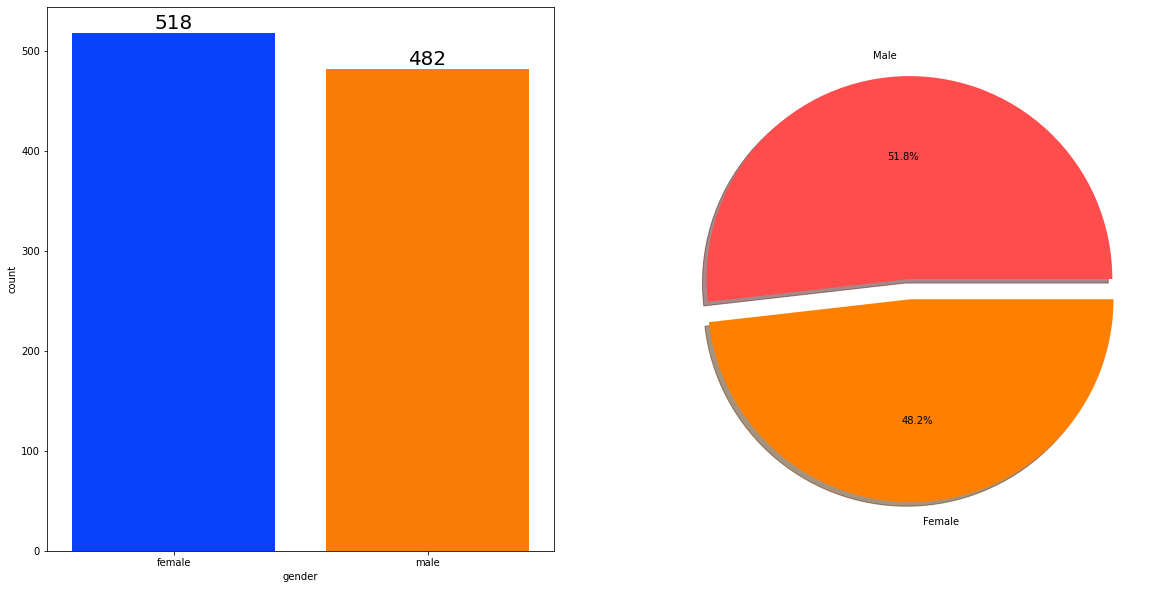

In [26]:
f,ax=plt.subplots(1,2,figsize=(20,10))
sns.countplot(x=df['gender'],data=df,palette ='bright',ax=ax[0],saturation=0.95)
for container in ax[0].containers:
    ax[0].bar_label(container,color='black',size=20)
    
plt.pie(x=df['gender'].value_counts(),labels=['Male','Female'],explode=[0,0.1],autopct='%1.1f%%',shadow=True,colors=['#ff4d4d','#ff8000'])
plt.show()

Insights

Gender has balanced data with female students are 518 (48%) and male students are 482 (52%)

In [28]:
df.head(2)

,gender,race_ethnicity,parental_level_of_education,lunch,test_preparation_course,math_score,reading_score,writing_score,total_score,average
0,female,group B,bachelor's degree,standard,none,72,72,74,218,72.666667
1,female,group C,some college,standard,completed,69,90,88,247,82.333333


# BIVARIATE ANALYSIS( Is gender has any impact on student's performance ?)

In [30]:
df['gender'].dtype

dtype('O')

In [31]:
df.dtypes

gender                          object
race_ethnicity                  object
parental_level_of_education     object
lunch                           object
test_preparation_course         object
math_score                       int64
reading_score                    int64
writing_score                    int64
total_score                      int64
average                        float64
dtype: object

In [33]:
numeric_df = df.select_dtypes(include='number')
gender_group = df.groupby('gender')[numeric_df.columns].mean()
print(gender_group)

        math_score  reading_score  writing_score  total_score    average
gender                                                                  
female   63.633205      72.608108      72.467181   208.708494  69.569498
male     68.728216      65.473029      63.311203   197.512448  65.837483


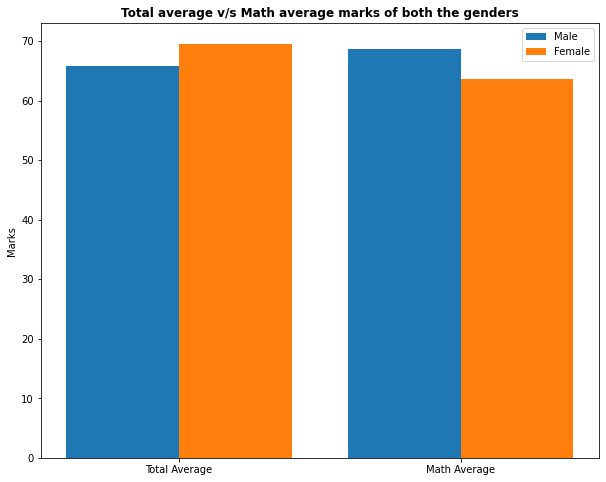

In [35]:
plt.figure(figsize=(10, 8))

X = ['Total Average','Math Average']


female_scores = [gender_group['average'][0], gender_group['math_score'][0]]
male_scores = [gender_group['average'][1], gender_group['math_score'][1]]

X_axis = np.arange(len(X))
  
plt.bar(X_axis - 0.2, male_scores, 0.4, label = 'Male')
plt.bar(X_axis + 0.2, female_scores, 0.4, label = 'Female')
  
plt.xticks(X_axis, X)
plt.ylabel("Marks")
plt.title("Total average v/s Math average marks of both the genders", fontweight='bold')
plt.legend()
plt.show()